In [3]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 KB 3.1 MB/s eta 0:00:00


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

from google.colab import files

In [ ]:
# Paraules= '("Reciclatge" OR "Minimització de residus" OR "Producció neta" OR "Zero emissions" OR "Creixement zero" OR "decreixement" OR "Economia verda" OR "Triple balanç" OR "Avaluació del Cicle de Vida" OR "Consum sostenible" OR "Responsabilitat Social Corporativa" OR "RSC" OR "Economia blava" OR "Creació de valor compartit" OR "Ecologia industrial" OR "Economia col·laborativa" OR "Economia circular")'
Paraules= ["Reciclatge" , "Minimització de residus" , "Producció neta" ,"Zero emissions" ,  
           "Economia verda" , "Triple balanç" ,"Avaluació del Cicle de Vida" , 
           '"Consum sostenible" OR "consum que és sostenible"', # ["Consum sostenible" ,"sostenible"], # sostenible sol ? 
           '"decreixement" OR "Creixement zero" OR "zero creixement"', # ["decreixement","Creixement zero","zero creixement"],
           "Responsabilitat Social Corporativa"#'"Responsabilitat Social Corporativa" OR "RSC"', #, ## ["Responsabilitat Social Corporativa", "RSC"] , 
           "Economia blava" , "Creació de valor compartit" , 
           "Ecologia industrial" , "Economia col·laborativa" , "Economia circular"]


Comptes=[
    '(from:diariARA OR from:elnacionalcat OR from:VilaWeb OR from:324cat OR from:govern OR from:generalitat OR from:uabbarcelona  OR from:ccoocatalunya OR from:ugtcatalunya)',
    '(from:CatalunyaRadio OR from:rac1 OR from:cgtcatalunya OR from:univgirona OR from:pimec OR from:gencat OR from:unibarcelona OR from:upfbarcelona OR from:la_upc)'
]


Data_inici='(since:2006-01-01)' 

In [80]:

tweets = []
t = time.time()
for compte in Comptes:
    for paraula in Paraules:
        query= '('+paraula+')' + compte + Data_inici
        for tweet in sntwitter.TwitterSearchScraper(query).get_items():
            tweets.append([tweet.date,tweet.user.username,tweet.content,paraula])

print('\n\n DADES DELS ULTIMS {} TWITS COMPLINT LES CONDICIONS'.format(len(tweets)))

# print('Tweets extrets per segon {:g}'.format(1000/(time.time()-t)))
# print('Tweets per dia natural',(1000/(tweets[0]['date']-tweets[-1]['date']).days))

<ipython-input-80-728dc3045efb>:26: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date,tweet.user.username,tweet.content,paraula])




 DADES DELS ULTIMS 818 TWITS COMPLINT LES CONDICIONS


In [57]:
ALL_tweets = []
t = time.time()
for paraula in Paraules:
    query= '('+paraula+')' + Data_inici +lang
    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        ALL_tweets.append([tweet.date,tweet.user.username,tweet.content,paraula])

print('\n\n DADES DELS ULTIMS {} TWITS COMPLINT LES CONDICIONS'.format(len(ALL_tweets)))

<ipython-input-57-18baad11892e>:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  ALL_tweets.append([tweet.date,tweet.user.username,tweet.content,paraula])




 DADES DELS ULTIMS 133636 TWITS COMPLINT LES CONDICIONS


In [83]:
T = pd.DataFrame(tweets,columns=['Date','User','Tweet','Paraula'])
T_All = pd.DataFrame(ALL_tweets,columns=['Date','User','Tweet','Paraula'])

In [84]:
T.to_csv('Tweets.csv', encoding = 'utf-8-sig') 
files.download('Tweets.csv')

T_All.to_csv('Tweets_All.csv', encoding = 'utf-8-sig') 
files.download('Tweets_All.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pujaré aquests documents al repositori github següent:

https://github.com/AlbertRoca29/EconomiaCircular

# EXECUTAR

In [85]:

import time

In [ ]:
url = 'https://raw.githubusercontent.com/username/repository-name/branch/path/to/csv/file.csv'

df = pd.read_csv(url)

In [62]:
T = pd.DataFrame(ALL_tweets,columns=['Date','User','Tweet','Paraula'])

In [63]:
T.describe()

<ipython-input-63-26b78e3f7d6f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  T.describe()


,Date,User,Tweet,Paraula
count,133636,133636,133636,133636
unique,131002,35582,129961,13
top,2022-03-14 09:00:12+00:00,Llobre_Gats,El neguit de l’economia circular https://t.co/...,Reciclatge
freq,8,1050,25,66633
first,2007-06-01 07:29:35+00:00,NaN,NaN,NaN
last,2023-03-18 19:49:07+00:00,NaN,NaN,NaN


In [71]:
from matplotlib import pyplot as plt
import numpy as np

<Axes: >

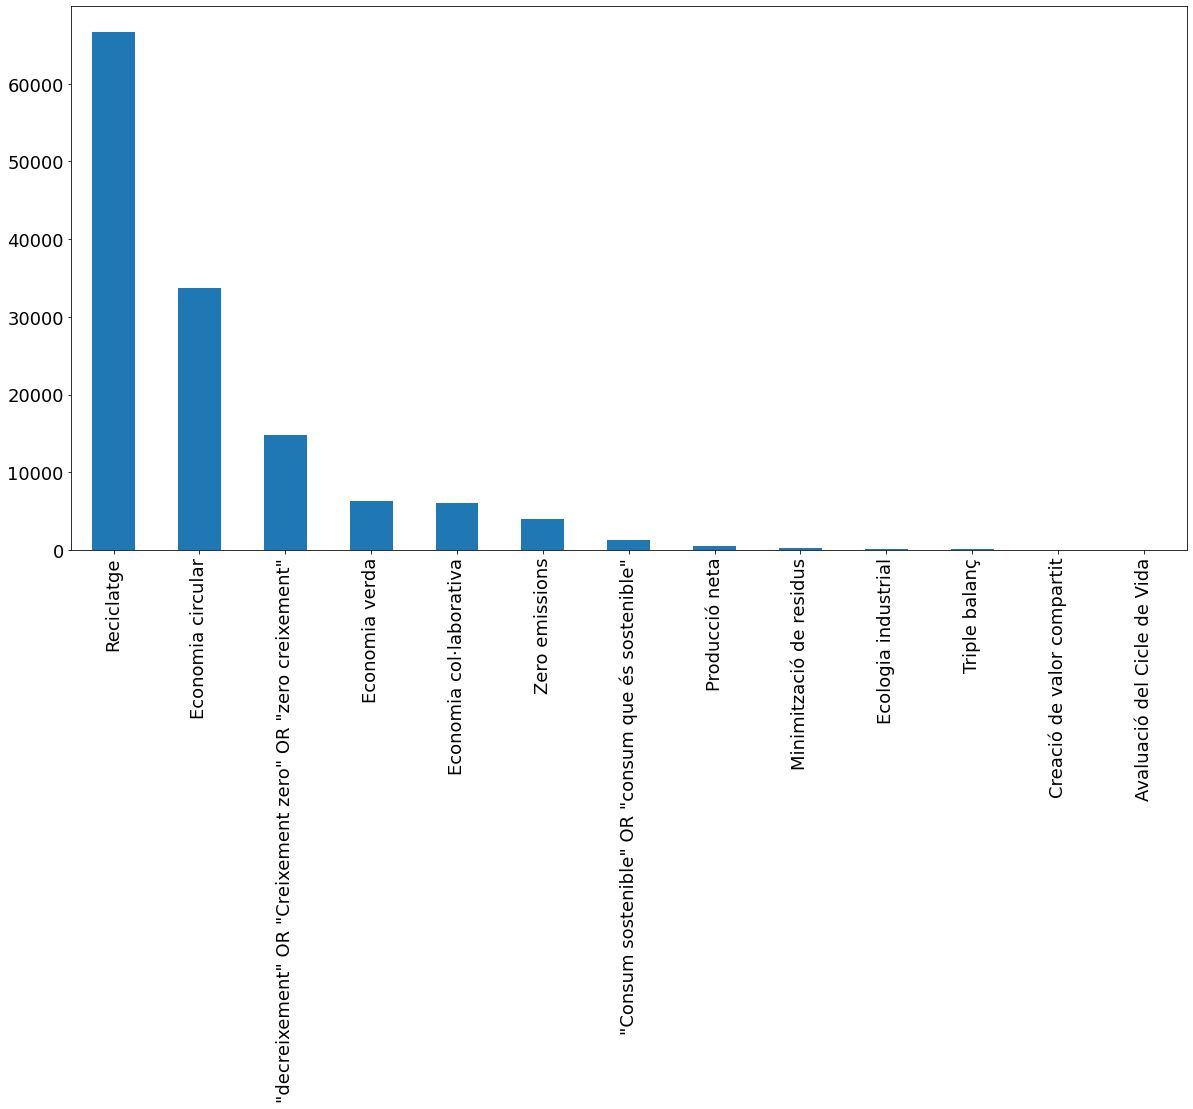

In [72]:
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
T['Paraula'].value_counts().plot(kind='bar')

In [65]:
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
T['User'].value_counts().plot(kind='bar')

<Axes: >

Error in callback <function flush_figures at 0x7f731bcc50d0> (for post_execute):


KeyboardInterrupt: ignored

In [69]:
for i in range(20):
    print(T['User'].value_counts()[i])

1050
630
625
580
545
512
462
384
345
330
321
319
309
298
298
289
284
277
266
256


In [14]:
(tweets[0]['date']-tweets[-1]['date']).days

TypeError: ignored

In [42]:
import random 

([<matplotlib.axis.XTick at 0x7f72b2c48d60>,
 [Text(0, 0, '2007'),
  Text(1, 0, '2008'),
  Text(2, 0, '2009'),
  Text(3, 0, '2010'),
  Text(4, 0, '2011'),
  Text(5, 0, '2012'),
  Text(6, 0, '2013'),
  Text(7, 0, '2014'),
  Text(8, 0, '2015'),
  Text(9, 0, '2016'),
  Text(10, 0, '2017'),
  Text(11, 0, '2018'),
  Text(12, 0, '2019'),
  Text(13, 0, '2020'),
  Text(14, 0, '2021'),
  Text(15, 0, '2022'),
  Text(16, 0, '2023')])

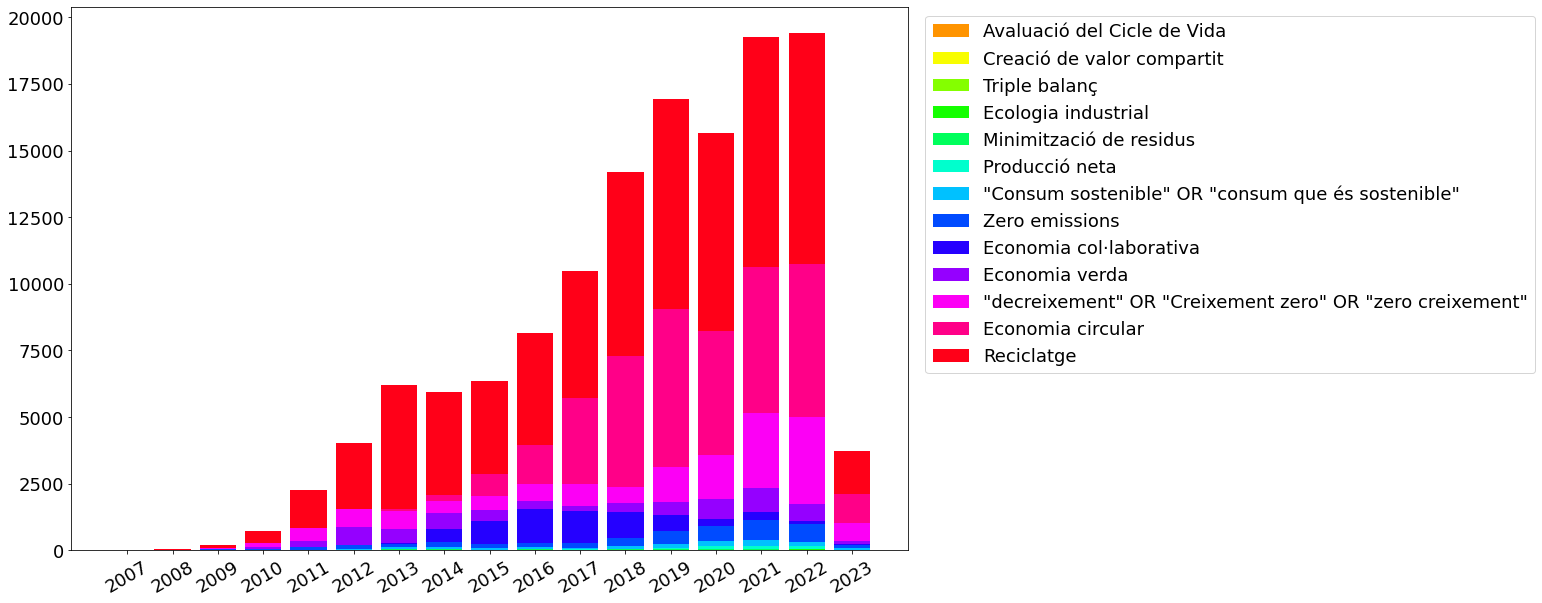

In [76]:
plt.figure(figsize=(15,10))
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0.1, 1, len(np.unique(T['Paraula']))))
i=0
bot = 0
year =   T[T['Paraula']=='Reciclatge'].groupby(pd.Grouper(key='Date', freq='Y'))['Paraula'].count()
year-=year
for paraula in list(T['Paraula'].value_counts().sort_values().keys()):
    T_p = T[T['Paraula']==paraula]
    year = (year + T_p.groupby(pd.Grouper(key='Date', freq='Y'))['Paraula'].count()).fillna(0)
    plt.bar(range(17),year,color=colors[i],label=paraula,bottom=bot)
    bot += year
    plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')
    i+=1
    year-=year
plt.xticks(np.arange(17), np.arange(2007,2024),rotation=30)

In [ ]:
list(T['Paraula'].value_counts().sort_values().keys())

['Triple balanç',
 'Producció neta',
 '"Consum sostenible" OR "consum que és sostenible"',
 '"Responsabilitat Social Corporativa" OR "RSC"',
 'Economia blava',
 'Economia verda',
 'Economia col·laborativa',
 'Zero emissions',
 '"decreixement" OR "Creixement zero" OR "zero creixement"',
 'Economia circular',
 'Reciclatge']

In [ ]:
range(10,20)

range(10, 20)

In [78]:
T.describe()

<ipython-input-78-26b78e3f7d6f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  T.describe()


,Date,User,Tweet,Paraula
count,133636,133636,133636,133636
unique,131002,35582,129961,13
top,2022-03-14 09:00:12+00:00,Llobre_Gats,El neguit de l’economia circular https://t.co/...,Reciclatge
freq,8,1050,25,66633
first,2007-06-01 07:29:35+00:00,NaN,NaN,NaN
last,2023-03-18 19:49:07+00:00,NaN,NaN,NaN


In [60]:
ALL_tweets[0:3]

[[datetime.datetime(2023, 3, 18, 17, 40, 7, tzinfo=datetime.timezone.utc),
  'Bcn_NouBarris',
  "♻️ Ja tens el lot de reciclatge?\xa0\n\xa0\nDemana'l al punt verd gratuïtament:\xa0\n\xa0\n🟤 Un cubell airejat per a la matèria orgànica.\n🟡🔵🟢 Bosses tricolor per a metalls i plàstics, paper i cartró i vidre.\n\xa0\nEstimar Barcelona és cuidar-la.\nMés info a https://t.co/QpTZmhRqoo.\n\xa0\n#CuidemBCN https://t.co/vtTTPgbJC0",
  'Reciclatge'],
 [datetime.datetime(2023, 3, 18, 17, 8, 5, tzinfo=datetime.timezone.utc),
  'Guix241',
  "@aigua_cat Però gasti el que gasti la tasa de reciclatge del rebut de l'aigua té un mínim,oi?. Aneu a cagar.",
  'Reciclatge'],
 [datetime.datetime(2023, 3, 18, 16, 40, tzinfo=datetime.timezone.utc),
  'JordiOliverSola',
  "🔴 És contraintuïtiu que els sistemes de dipòsit que tan bons resultats dónen per incentivar el #reciclatge a través de #SDDR no acabin de rutllar en #reutilització.\n\n🇩🇪 ~70% dels gots reutilitzables que entrega McDonald's (fiança de 2€) mai 

In [79]:
from google.colab import files

T.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
print('Tweets per dia natural {:g}'.format(len(ALL_tweets)/(ALL_tweets[0][0]-ALL_tweets[-1][0]).days))
print('Tweets extrets per segon {:g}'.format(len(ALL_tweets)/(time.time()-t)))
print('Temps 5 anys a aquest ritme {:g}'.format( 365*5 /(ALL_tweets[0][0]-ALL_tweets[-1][0]).days * (time.time()-t)  )  )

Tweets per dia natural 28.0101
Tweets extrets per segon 25.0163
Temps 5 anys a aquest ritme 2043.4


In [53]:
with open('my_list.txt', 'w') as f:
    f.write(tweets)

TypeError: ignored